<a href="https://colab.research.google.com/github/jamissi/Estudos-DataScience/blob/main/PARTE_3_(Cap_9_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARTE 03 - ALGORITMOS DE APRENDIZAGEM DE MÁQUINA

\
##**Cap 09 -** Regressão Linear Simples


variável independente (também chamada de variável preditora) e uma variável dependente (também chamada de variável de resposta)

>é utilizada em problemas em que é necessário identificar um modelo que represente a relação entre duas variáveis, sendo que uma altera o valor da outra de maneira linear.



In [ ]:
#@title Treinando algoritmo
import matplotlib.pyplot as plt
import pandas as pd

#importando biblioteca scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#definindo o dataset
dataset = pd.read_csv('/content/drive/MyDrive/base_dados/arquivos_paraestudo/tempo_salarios.csv')

#definindo váriaveis dependentes e independentes:
X = dataset.iloc[:,:-1].values #estamos selecionando colunas AnosdeExperiencia - carregando variável independentes
y = dataset.iloc[:,1].values #e aqui coluna Salario

#divisão da amostra com verificação cruzada (cross-validation)
  #divindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

#Ajustando o modelo de regressão linear para o dataset de treino
regressor = LinearRegression()

#prevendo o valor de y usando os valores de teste
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#Visualizando os resultados do treino
plt.figure(figsize=(15,8))
plt.plot(X,y,'Dr')
plt.title('Salário x Experiência - Treino')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

#Verificando se o modelo consegue prever o restante das amostras. 33% restante
plt.figure(figsize=(15,8))
plt.plot(X_test,y_test,'Dr')
plt.plot(X_train, regressor.predict(X_train), color='orange')
plt.title('Salário x Experiência - Teste')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()



\
##**Cap 10** - Regressão Linear Múltipla

- Trata de problemas em que existe uma relação linear entre múltiplas variáveis, de modo que a variável dependente é influenciada por todas essas varáveis.
- Essa função toma a forma de um polinômio de 1° grau como o somatório de fatores variáveis.

---

  ***y= ax<sub>1</sub> + bx<sub>2</sub> + cx<sub>3</sub> + dx<sub>4</sub>***


* **y** é a variavel dependente que desejamos descobrir
*   **a, b, c, d** são coeficientes
*   **x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, x<sub>4</sub>** são variáveis independentes




* ***Significância Estatística*** - procedimento para verificar a discrepância de uma hipótese estatística em relação aos dados obervados, utilizando evidência.

* ***P-values*** - métrica utlizada em situações onde se quer saber se o resultado do modelo pode ocorrer na vida real.
    - se o valor foi **muito alto**, as chance do evento acontecer em distribuição normal são **muito pequenas**.

    - se o valor for **menos que 0.5**, podemos tratar a variável como **significativa**

    - **o p-value nunca poderá ser 0**

```
import statsmodels.api as sm

X_opt= X[:,[2,3]]
regressor_OLS= sm.OLS(y,X_opt).fit
regressor_OLS.summary()
```

In [ ]:
#@title Aplicando:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np



dataset1= pd.read_csv('/content/drive/MyDrive/base_dados/startups_utilizar.csv')

#Separando variaveis independetes e dependentes
X= dataset1.iloc[:,:-1].values
y= dataset1.iloc[:, 6].values

#codificando a variável categórica Estado
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
#X = np.array(columnTransformer.fit_transform(X), dtype = np.float)
#evitando a armadilha da variável fictícia
#X= X[:, 1:] caso tivessemos feito no spyder.

dataset1 = dataset1.drop('Rio de Janeiro', axis=1)

#cross-validation
#dividindo o dataset em treino e teste
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size= 0.2, random_state=0)
#regressão linear
regressor= LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
dataset1

#visualizando como o modelo se comportou
for k in range(len(y_test)):
  y_teste = y_test[k]
  y_previsto = y_pred[k]
  erro = abs((y_test[k] - y_pred[k])/y_pred[k]*100)
  print(f'y_teste:{y_teste:.2f} y_previsto:{y_previsto:.2f} erro:{erro:.2f}')

#verificando a significância estatística das variáveis
X_opt= X[:,[2,3]]
regressor_OLS= sm.OLS(y, X_opt).fit()
regressor_OLS.summary()
regressor_OLS.pvalues

\
##**Cap 11** - Regressão Polinomial

Uma função que consiste em uma expressão matemática de uma única variável, mas de vários graus e coeficiente.   
Por exemplo:
***y= -2x^4 + 2x³ + 3x² -2x***

---


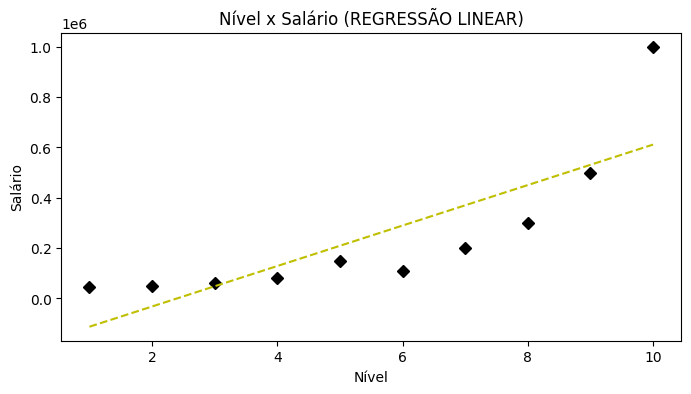

In [ ]:
#@title ###**Visualizando modelo como Regressão Linear**
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split #para criar amostra com verificacao cruzada
from sklearn.linear_model import LinearRegression #treinamento de algoritmo

dataset = pd.read_csv("/content/drive/MyDrive/base_dados/cargo_nivel_salarios.csv")
X= dataset.iloc[:, 1:2].values #variavel independente (variável preditora)
y= dataset.iloc[:, 2].values #variavel dependente (variável de resposta)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg= LinearRegression()
lin_reg.fit(X, y)

plt.figure(figsize=(8,4))
plt.plot(X, y, 'Dk')
plt.plot(X, lin_reg.predict(X), 'y--')
plt.title('Nível x Salário (REGRESSÃO LINEAR)')
plt.xlabel('Nível')
plt.ylabel('Salário')
plt.show()

##### Podemos ver que a *regressão linear* não se encaixa nesse modelo.
##### Este é um exemplo de ***SUB-AJUSTE (UNDERFITTING)***.pois simplifica demais os dados e não serve para realizar previsões, pois seu erro é muito alto.

---
\

\

###Criando modelo de ***Regressão Polinomial***


Cria um objeto do tipo polinomial:
  ```
  poly_reg= PolynomialFeatures(degree= n) -> O 'n' se refere ao grau
  ```
Os dados do tipo treino (X_train) são transformados em polinomiais:
  ```
  X_poly= poly_reg.fit_transform(X_train)
  ```
O objeto está sendo ajustado aps dados transformados:
  ```
  poly_reg.fit(X_poly, y_train)
  ```
\

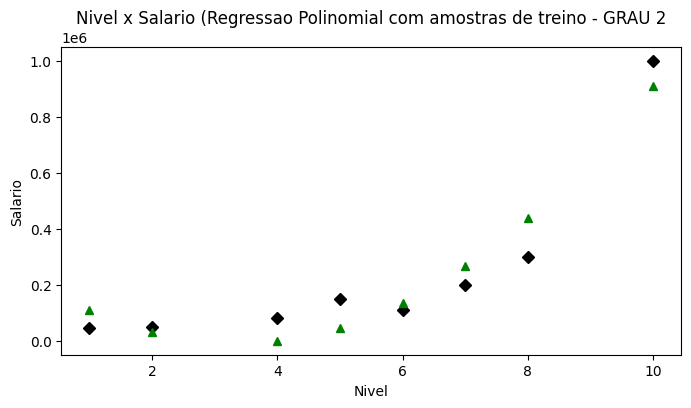

Erro do grau 2°: -5.43e+10


In [ ]:
#@title ###**2° GRAU**
from sklearn.preprocessing import PolynomialFeatures #importando o método para criarmos o modelo de Regressão Polinomial
poly_reg= PolynomialFeatures(degree=2) #GRAU
X_poly_2= poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly_2, y_train)
#poly_reg.fit(X_train, y_train)
lin_reg_2= LinearRegression()
lin_reg_2.fit(X_poly_2, y_train)

plt.figure(figsize=(8,4))
plt.plot(X_train, y_train, 'Dk') #dados reais
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)),'^g') #dados de previsão
plt.title('Nivel x Salario (Regressao Polinomial com amostras de treino - GRAU 2')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()



In [ ]:
#@title ###**4° GRAU**
poly_reg= PolynomialFeatures(degree=4) #ALTERANDO PARA 4  <--
X_poly_4= poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly_4, y_train)
poly_reg.fit(X_train, y_train)
lin_reg_2= LinearRegression()
lin_reg_2.fit(X_poly_4, y_train)

##GRÁFICO 4° - AMOSTRAS TREINO
plt.figure(figsize=(4,2))
plt.plot(X_train, y_train, 'Dr') #dados reais
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)),'^b') #dados de previsão
plt.title('Nivel x Salario (Regressao Polinomial 4° - amostras de TREINO)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

##GRÁFICO 4° - AMOSTRAS DE TESTE
plt.figure(figsize=(4,2))
plt.plot(X_test, y_test, 'Dg') #dados reais
plt.plot(X_test, lin_reg_2.predict(poly_reg.fit_transform(X_test)),'^y') #dados de previsão
plt.title('Nivel x Salario (Regressao Polinomial 4° - amostras de TESTE)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

##GRÁFICO 4° - TODAS AS AMOSTRAS
plt.figure(figsize=(8,4))
plt.plot(X, y, 'Dc') #dados reais
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),'^m--') #dados de previsão
plt.title('Nivel x Salario (Regressao Polinomial 4° - TODAS as amostras)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

In [ ]:
#@title ###**8° GRAU**
poly_reg = PolynomialFeatures(degree = 8)

X_poly_8 = poly_reg.fit_transform(X)
poly_reg.fit(X_poly_8, y)
poly_reg.fit(X,y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_8, y)

##GRÁFICO 8° COM TODAS AS AMOSTRAS
plt.figure(figsize=(8,4))
plt.plot(X, y, 'Dm') #dados REAIS
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),'^y--') #dados de previsão
plt.title('Nivel x Salario (Regressao Polinomial 8° - TODAS as amostras)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

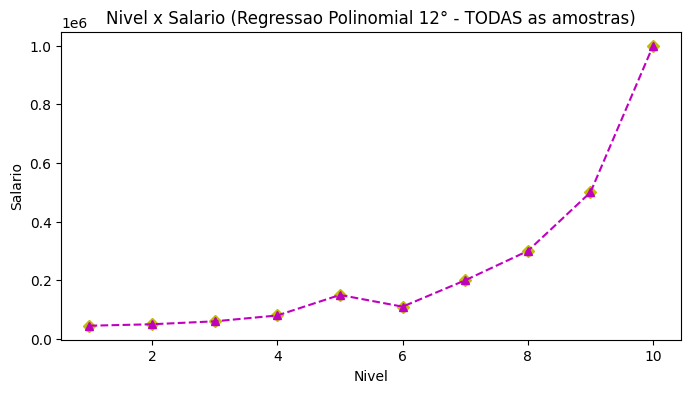

In [ ]:
#@title ###**12° GRAU**
poly_reg = PolynomialFeatures(degree= 12)

X_poly_12= poly_reg.fit_transform(X)
poly_reg.fit(X_poly_12,y)
poly_reg.fit(X,y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_12, y)

##GRÁFICO 12° COM TODAS AS AMOSTRAS
plt.figure(figsize=(8,4))
plt.plot(X, y, 'Dy') #dados da previsao
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),'^m--') #modelo
plt.title('Nivel x Salario (Regressao Polinomial 12° - TODAS as amostras)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

##### Um modelo de grau tão elevado (12) é complexo demais e é um exemplo de   **SOBREAJUSTE** (*OVERFITTING*).                       
##### Este modelo pode ter aprendido alguns ruídos da amostra deixando de servir para fazer previsões reais.

\

### ⭐ UNDERFITTING X OVERFITTING

Podemos ver os exemplos citados acima de UNDERFITTING e OVERFITTING
Resumo:
* ***Underfitting*** - Modelo simplificado demais deixando de servir, pois sua taxa de erro é muito alta. (Exemplo em Regressão linear)
* ***Overfitting*** - Modelo ajustado demais, um grau muito complexo podendo ter alguns dados que são anomalias. (Exemplo em Grau 12)



Ambos casos não servem mais para fazer previsões reais.



O Scikit possui um módulo que contém uma função para verificar qual é o erro, utiliza verificação cruzada:
```
from sklearn.model_selection import cross_val_score
```

O escore é o erro quadrático médio negativo.

In [ ]:
#@title ###Erro 1° Grau
from sklearn.model_selection import cross_val_score
print('Erro do grau 1°: {:.2e} '.format(cross_val_score(LinearRegression(), X, y, scoring= 'neg_mean_squared_error', cv= 10).mean()))

Erro do grau 1°: -5.43e+10 


\

##**Cap 12** - Árvore de Decisão (Classificação e regressão)

> É um algoritmo de aprendizagem de máquina, que possui uma variável destino (alvo ou *target*), predeterminada.   
Sua função é separar subconjuntos de dados que possuam características
  comuns (*diferenciador*).

> O algoritmo indentificará os atributos das amostras e separará o melhor deles.                            
Esse atributo escolhido servirá como **nó raiz**, ponto de partida da árvore de decisão.   
O restantes das características serão utilizadas como nó de decisão para o
restante dos dados, dividindo o dataset em conjuntos cada vez menores.

\

####Árvores de decisão -- ***CLASSIFICAÇÃO***
> São utilizadas em problemas em que queremos separar um grupo de amostras em grupos que tenham características iguais, para prever a qual subconjuntos, amostras que não pertence a esse conjunto, pertenceriam.


---
\
***``` from sklearn import tree```*** :
Utilizado para criação de árvores de decisões. Recebe duas matrizes (X, y).
  * X - recebe as características das amostras.  
        N x M.  
        N é a quantidade de amostras e M quantidade de caracteristica de cada amostra.
  * y - contém uma única coluna contendo o valor inteiro indicando a classe a que cada amostra pertence.
        N x 1

 Exemplo no dataset "IRIS" utilizado abaixo:


```
from sklearn import datasets
iris = datasets.load_iris()
```


- 1° Matriz é **X**
 > N(150) x M(4):
  * 150 são as amostras das flores
  * 4 são as características (largura e comprimento da pétala e da sépala)
- 2° Matriz é **y**
  > N(150)x 1:
   * 150 Linhas
   * 1 única coluna com 0, 1, 2 (classes que cada amostra pertence)
    * 0 é Setosa
    * 1 é Versicolor
    * 2 é Virgínica
              

In [ ]:
#@title #####Informações do dataset iris:
from sklearn.datasets import load_iris

# Carregar o conjunto de dados Iris
iris = load_iris()

# Obtendo o número de amostras
numero_linhas, numero_colunas = iris.data.shape
print("Número de Linhas:", numero_linhas)
print("Número de Colunas:", numero_colunas)

# Nomes das características (atributos)
nomes_caracteristicas = iris.feature_names
print("\nNomes das Características:")
print(nomes_caracteristicas)

# Nomes das classes (rótulos)
nomes_classes = iris.target_names
print("\nNomes das Classes:")
print(nomes_classes)


Número de Linhas: 150
Número de Colunas: 4

Nomes das Características:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Nomes das Classes:
['setosa' 'versicolor' 'virginica']


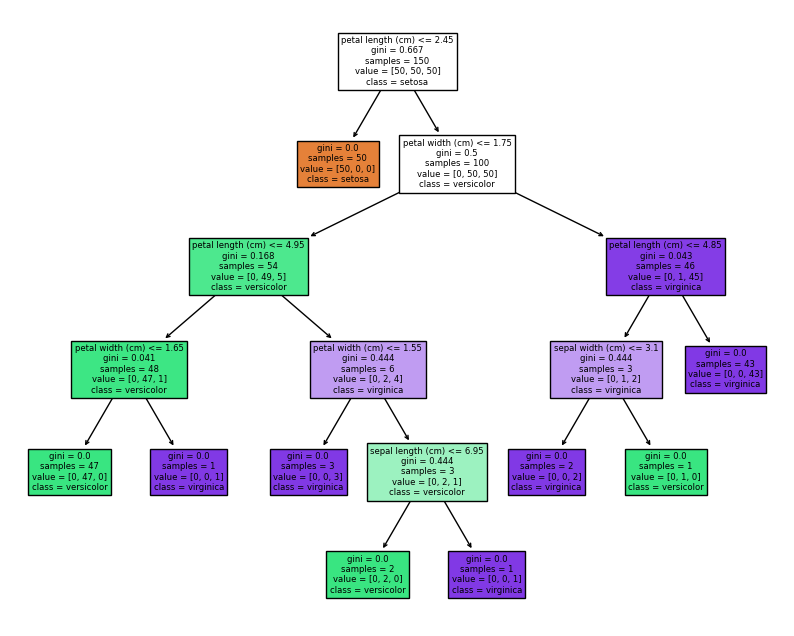

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris() #carregando o dataset iris

#Definindo matriz X e y
X,y= iris.data, iris.target #target é a variavel destino

#Criando um classificador do tipo arvore de decisao
classificador= tree.DecisionTreeClassifier()
classificador.fit(X,y)

#imprimindo a arvore
fig= plt.figure(figsize= (10,8))
tree.plot_tree(classificador, feature_names= iris.feature_names, class_names= iris.target_names, filled= True)
fig.show()

A árvore agrupa os valores de acordo com suas características mais importantes.   
  Um percentual separa as espécies de suas características em um intervalo específico.

\
###Utilizando gráfico de disperção para visualizar os agrupamentos

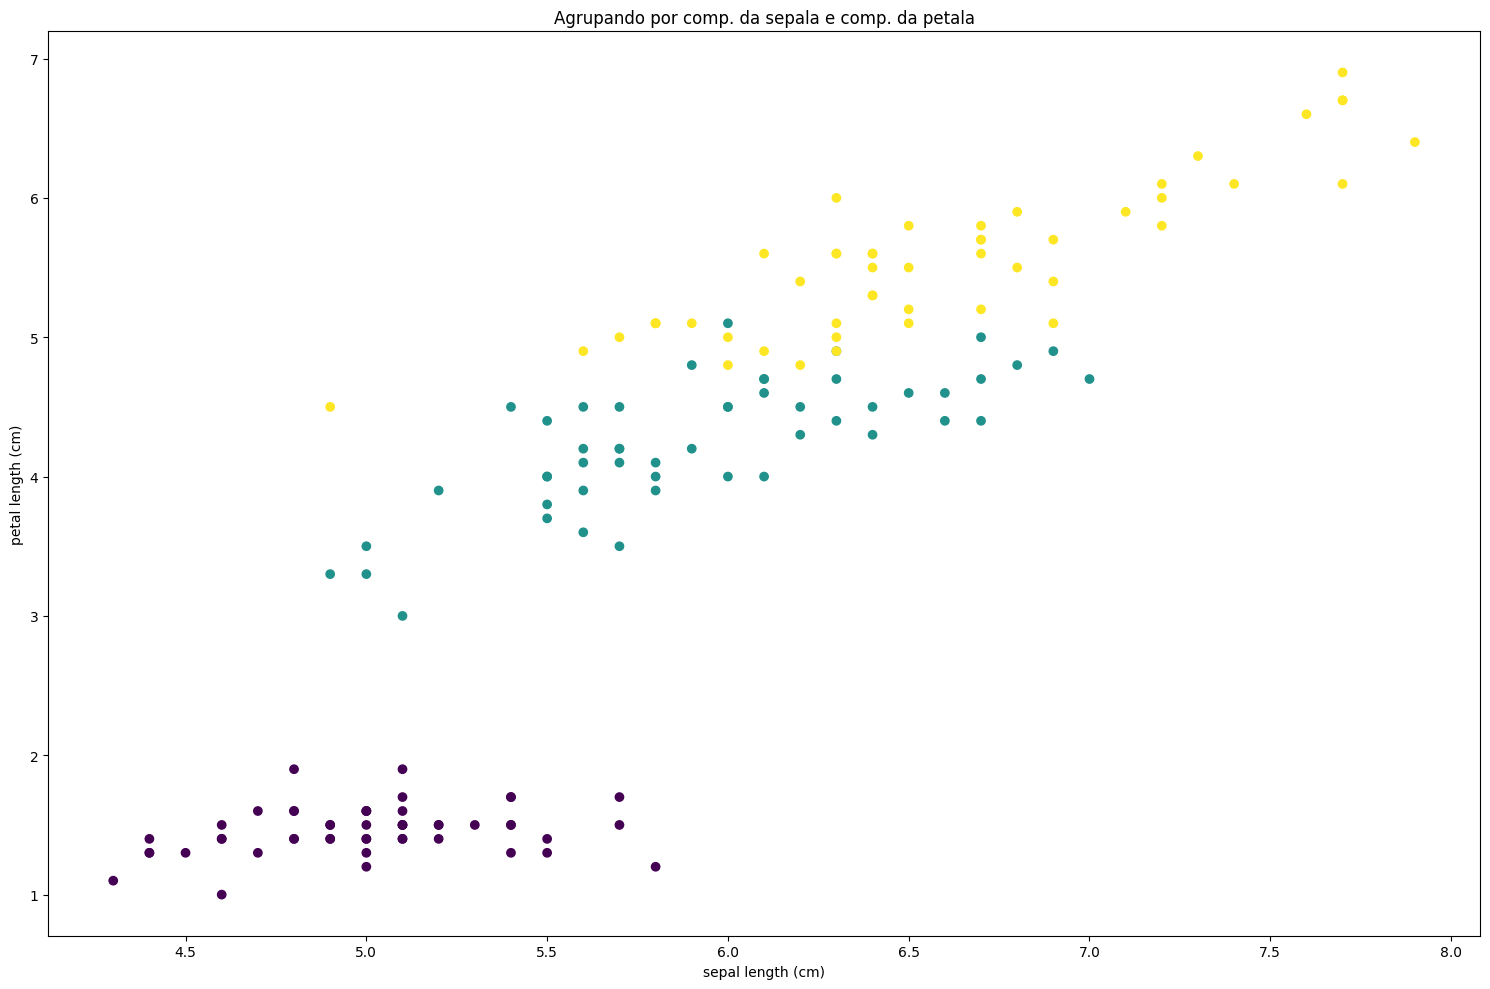

In [ ]:
plt.figure(figsize= (15,10))
plt.scatter(iris.data[:, 0], iris.data[:,2], c= iris.target)
plt.title('Agrupando por comp. da sepala e comp. da petala')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.tight_layout()
plt.show()

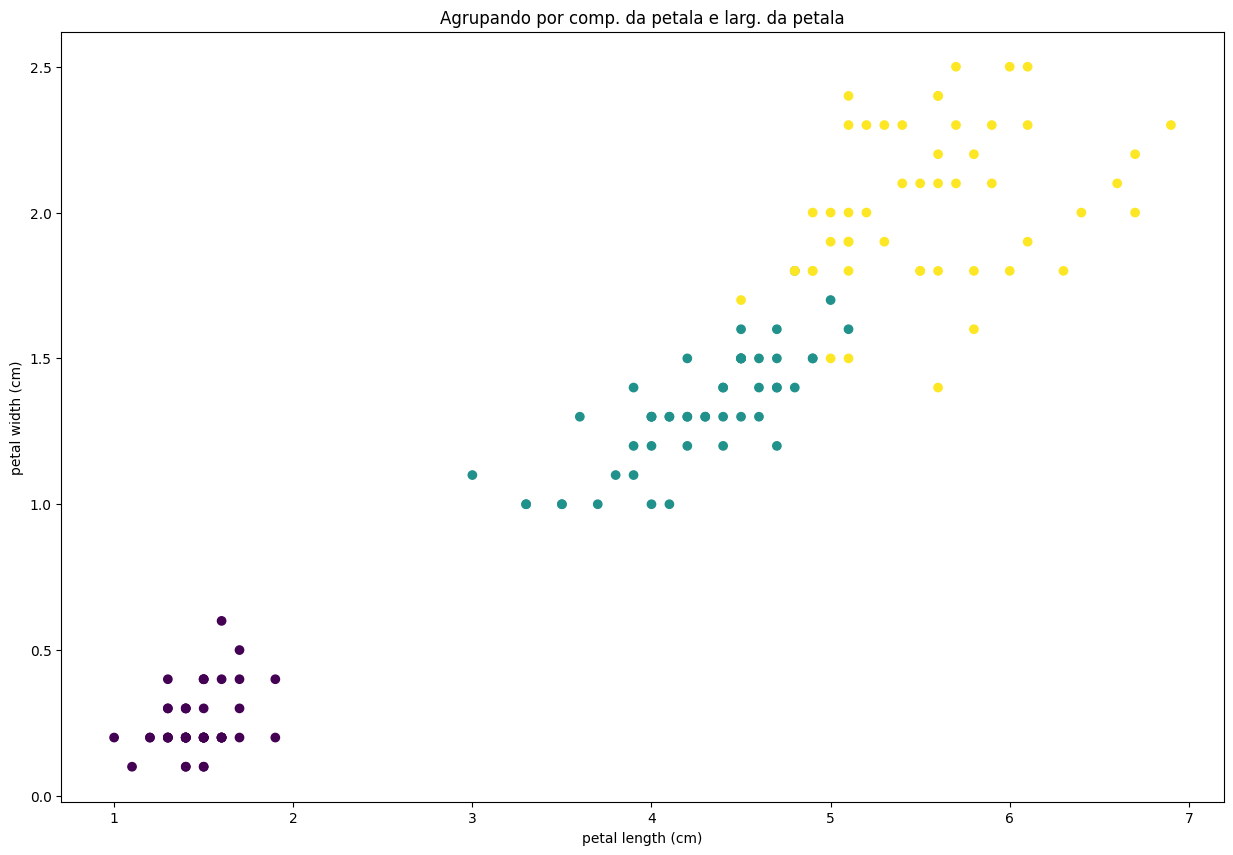

In [ ]:
plt.figure(figsize= (15,10))
plt.scatter(iris.data[:,2], iris.data[:,3], c= iris.target)
plt.title('Agrupando por comp. da petala e larg. da petala')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.tight_layout
plt.show()

\
##**Cap 13** - Regressão Logística

---

* Utilizada em problemas onde a variável dependente for do tipo categórica e os dados puderem ser agrupados em duas classes.



Apesar do nome, trata-se mais de um algoritmo de classificação.  
Deve ser usada em problemas de classificação BINÁRIOS, problemas em que os dados devem ser distribuidos em DOIS grupos distintos e exclusivos como:
 - O cliente comprou ou não comprou um certo produto?

---



A variável dependente sempre será um RÓTULO binário e não um valor, diferente da regressão linear, podendo representar apenas dois valores:
- 0 ou 1
- verdadeiro ou falso
- positivo ou negativo ... etc

**A ideia da Regressão Logítisca é a de definir uma função que retorna uma probabilidade de um dado elemento pertencer a classe 0 ou 1.**

\



###**Exemplos iniciais**

#####Exemplos de problemas em que a regressão linear não funciona:

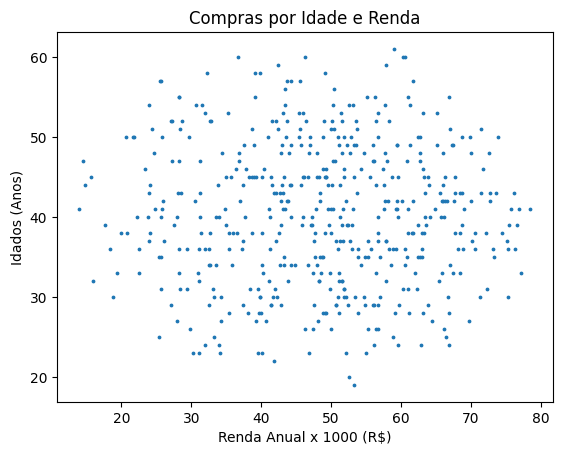

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

EIXO_LINHA = 0
EIXO_COLUNA = 1
dados= pd.read_csv('/content/drive/MyDrive/base_dados/vendas.csv')
compradores = dados[dados['Comprou']==1]
compradores.drop(['Comprou'],axis=EIXO_COLUNA)

plt.title('Compras por Idade e Renda')
plt.xlabel('Renda Anual x 1000 (R$)')
plt.ylabel('Idados (Anos)')
plt.scatter(compradores.Renda/1000, compradores.Idade, s=3)
plt.show()

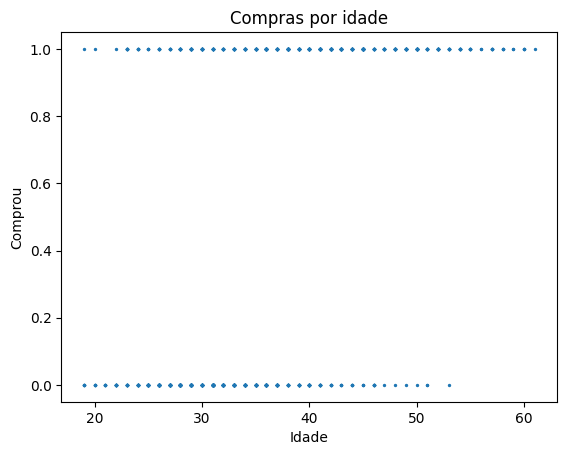

In [ ]:
X= dados['Idade']
y= dados['Comprou']
plt.title('Compras por idade')
plt.xlabel('Idade')
plt.ylabel('Comprou')
plt.scatter(X,y,s=2)
plt.show()

#####Gráfico de função SIGMÓIDE - Função de probabilidade

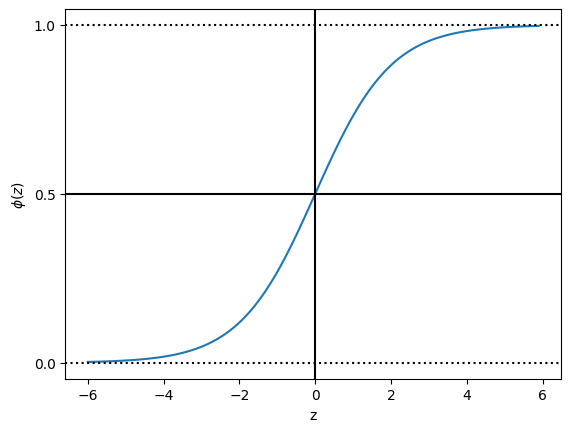

In [ ]:
#@title .
import numpy as np

def sigmoide(z):
  resultado = 1.0/ (1.0 + np.exp(-z))
  return resultado

z= np.arange(-6, 6, 0.1)
fi_z= sigmoide(z)

#desenhando a curva sigmoide
plt.plot(z, fi_z)

#eixo vertical (y)
plt.axvline(0.0, color='k')

#eixo horizontal (x)
plt.axhline(y= 0.5, color='k')

#linha tracejada
plt.axhline(y= 0.0, color='k', ls= 'dotted')

#linha tracejada
plt.axhline(y= 1.0, color='k', ls='dotted')

#marcadores do eixo Y
plt.yticks([0.0,0.5,1.0])

#Legendas
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

\

\
###**Análise Exploratória de dados**

\

\

####***Modelo para identificar se pacientes têm ou não diabetes (parte1)*** - Tratando dados do DataFrame

\

In [ ]:
#@title :
import pandas as pd

''' Atributos:

#Gravidezes - Número de vezes em que a pessoa engravidou
Glicose- Concentração de glicose no sangue com jejum de 2 horas
PD - Pressão sanguínea Diastólica
DobraTricepes- espessura da dobra da pele do tricpes em mm
Insulina - Concetração insulina sérica
IMC - Indice de massa corporal
DiabetesPedigreeFunction - Tendéncia genética para diabetes
Idade - idade do paciente em anos
Classe - Variável alvo. Contém 0 se o paciente não tem diabetes e 1 para se possui diabetes

'''

df= pd.read_csv("/content/drive/MyDrive/base_dados/diabetes.csv",
                names=['#Gravidezes','Glicose', 'PD', 'DobraTriceps',
                      'Insulina', 'IMC', 'DPF', 'Idade', 'Classe'])


print('Estatísticas Descritivas: ')
print(df.describe())
print('-'*40)
#Identificando quantos valores 0 estão presentes nos atributos
print('\nContando 0 na amostra:\n')
print(f'gravidezes: {(df["#Gravidezes"]==0).sum()}')
print(f'glicose: {(df["Glicose"]==0).sum()}')
print(f'pd: {(df["PD"]==0).sum()}')
print(f'DobraTriceps: {(df["DobraTriceps"]==0).sum()}')
print(f'Insulina: {(df["Insulina"]==0).sum()}')
print(f'IMC: {(df["IMC"]==0).sum()}')
print(f'Idade: {(df["Idade"]==0).sum()}\n')
print('-'*40)
#Removendo valores 0 do registro
print(f'\nLinhas antes da exclusao dos 0: {len(df)}')
excluirGlicose0= df.index[df.Glicose == 0].tolist()
excluirPD0= df.index[df.PD == 0].tolist()
excluirTriceps0= df.index[df.DobraTriceps == 0].tolist()
excluirInsulina0= df.index[df.Insulina == 0].tolist()
excluirIMC0= df.index[df.IMC == 0].tolist()
temp = excluirGlicose0
temp += excluirPD0
temp += excluirTriceps0
temp += excluirInsulina0
temp += excluirIMC0
df = df.drop(df.index[temp])
print(f'Linhas apos as exclusao dos 0: {len(df)}\n')
print('-'*40)

#visualizando quantas pessoas da amostra possui e nao possui diabetes
classe1 = len(df[df.Classe==1])
classe0 = len(df[df.Classe==0]) #c/diabetes
print(f'\nPessoas sem diabetes: {classe0} ({(classe0 * 100 / (classe0 + classe1)):.2f}%)')
print(f'Pessoas com diabetes: {classe1} ({(classe1 * 100 / (classe0 + classe1)):.2f}%)')



Estatísticas Descritivas: 
       #Gravidezes     Glicose          PD  DobraTriceps    Insulina  \
count   768.000000  768.000000  768.000000    768.000000  768.000000   
mean      3.845052  120.894531   69.105469     20.536458   79.799479   
std       3.369578   31.972618   19.355807     15.952218  115.244002   
min       0.000000    0.000000    0.000000      0.000000    0.000000   
25%       1.000000   99.000000   62.000000      0.000000    0.000000   
50%       3.000000  117.000000   72.000000     23.000000   30.500000   
75%       6.000000  140.250000   80.000000     32.000000  127.250000   
max      17.000000  199.000000  122.000000     99.000000  846.000000   

              IMC         DPF       Idade      Classe  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000   

<Axes: ylabel='Quantidade'>

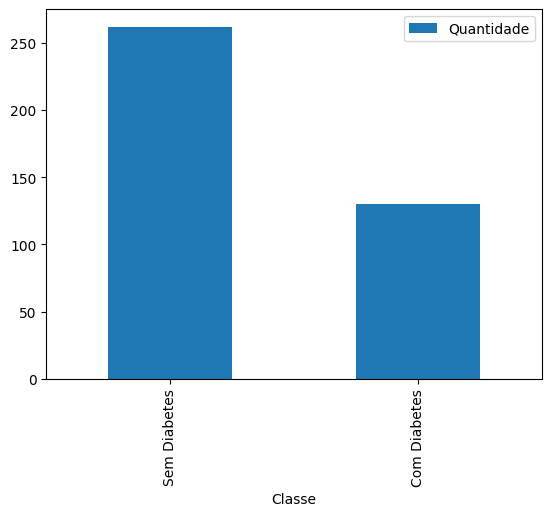

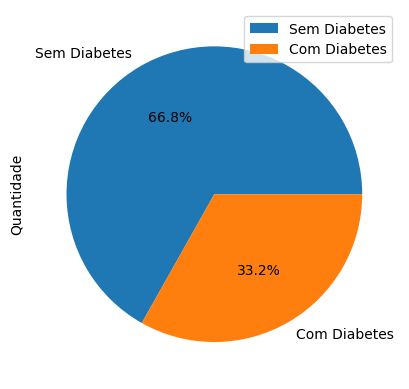

In [ ]:
#@title Gráficos
df_classe= pd.DataFrame({'Classe':['Sem Diabetes','Com Diabetes'],
                         'Quantidade': [classe0, classe1]})
df_classe.plot(kind='bar', x='Classe', y='Quantidade')
df_classe.plot(kind='pie', y='Quantidade', labels=df_classe['Classe'], autopct='%1.1f%%')


\
####***Modelo p/identificar se pacientes têm ou não diabetes (parte2)***  
* Analisando variáveis por meio de gráficos (histogramas e boxplot)

\

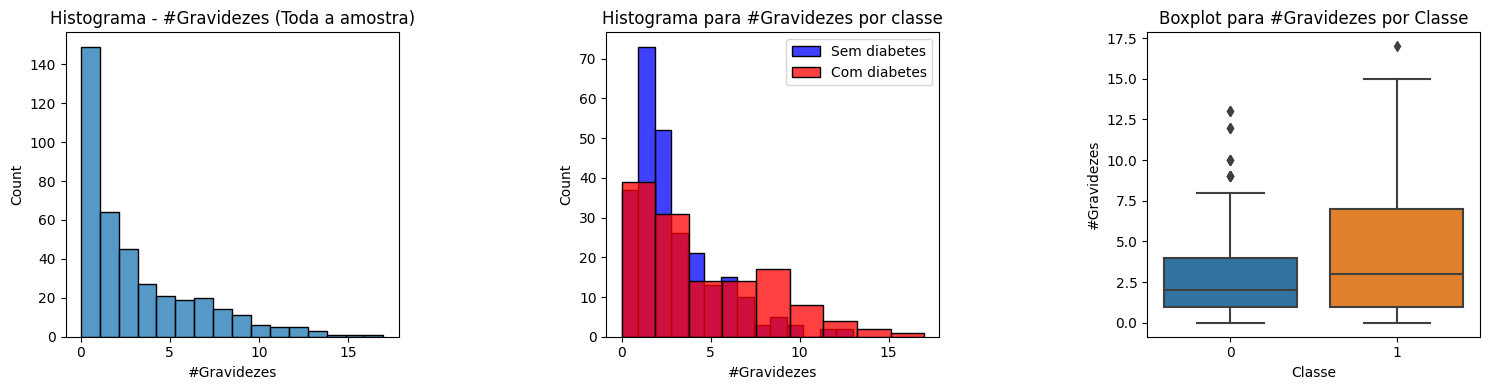

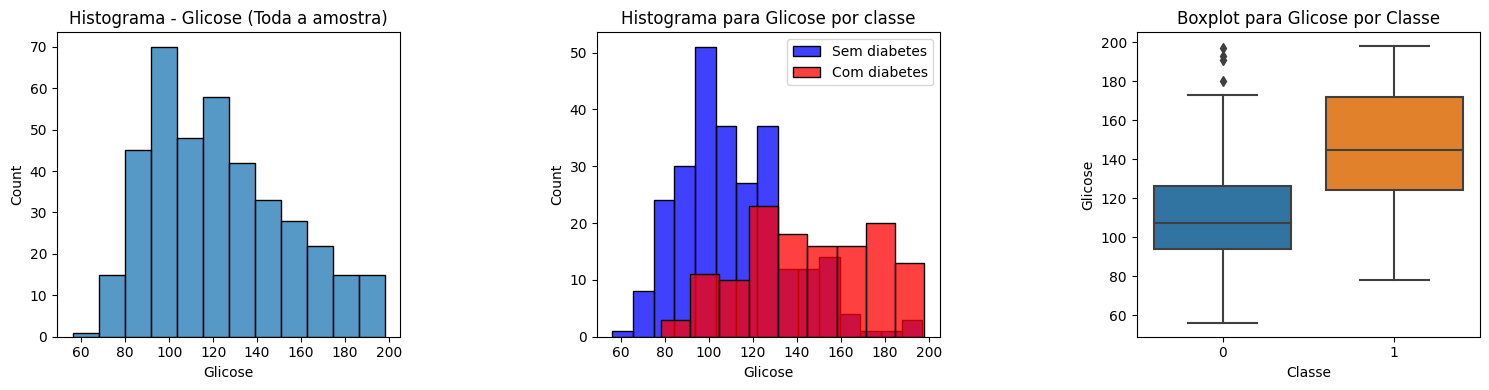

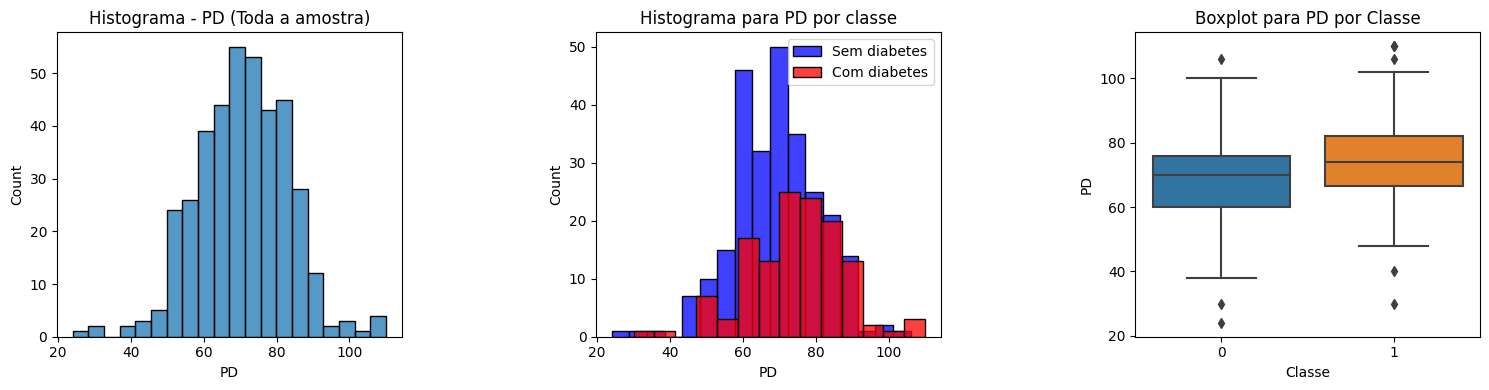

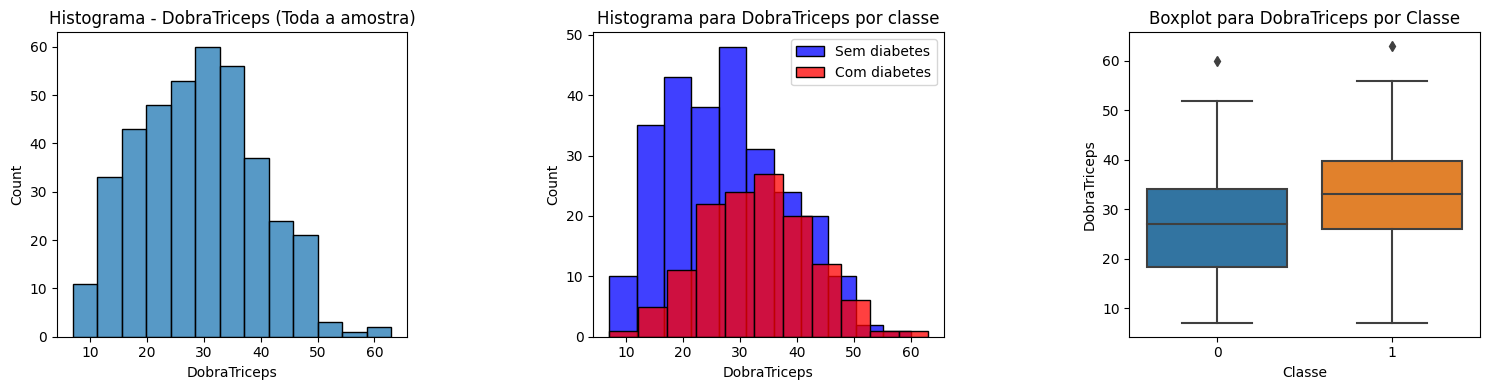

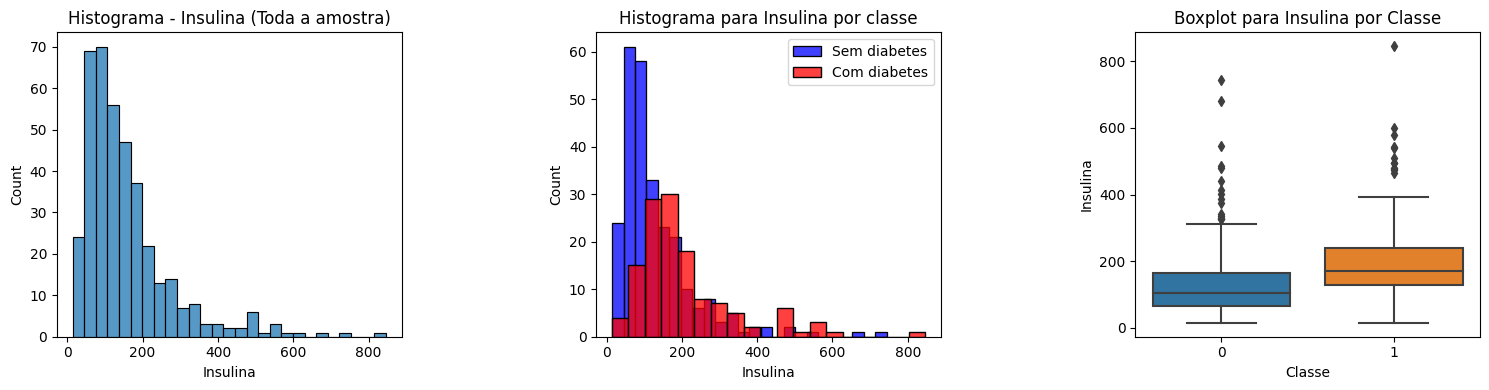

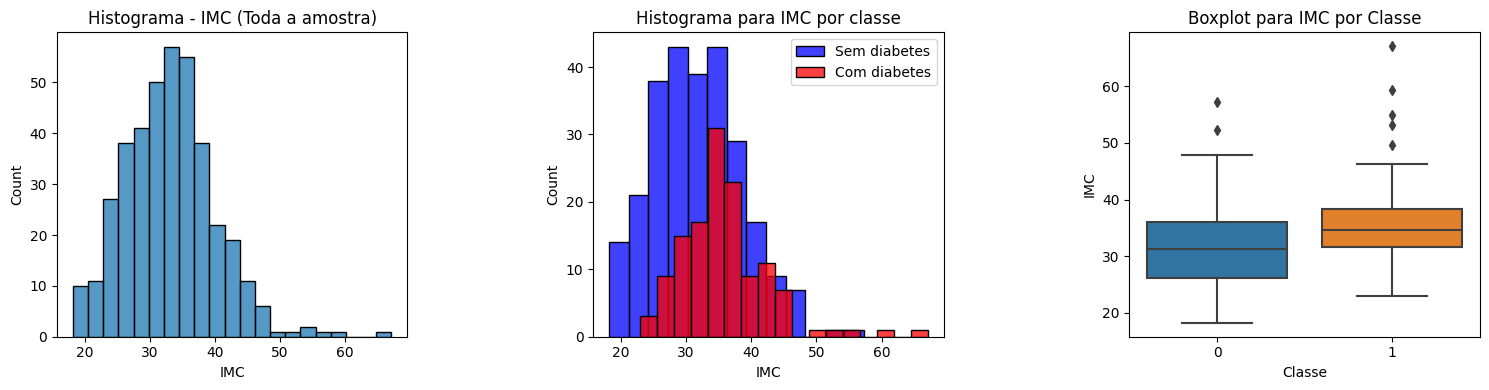

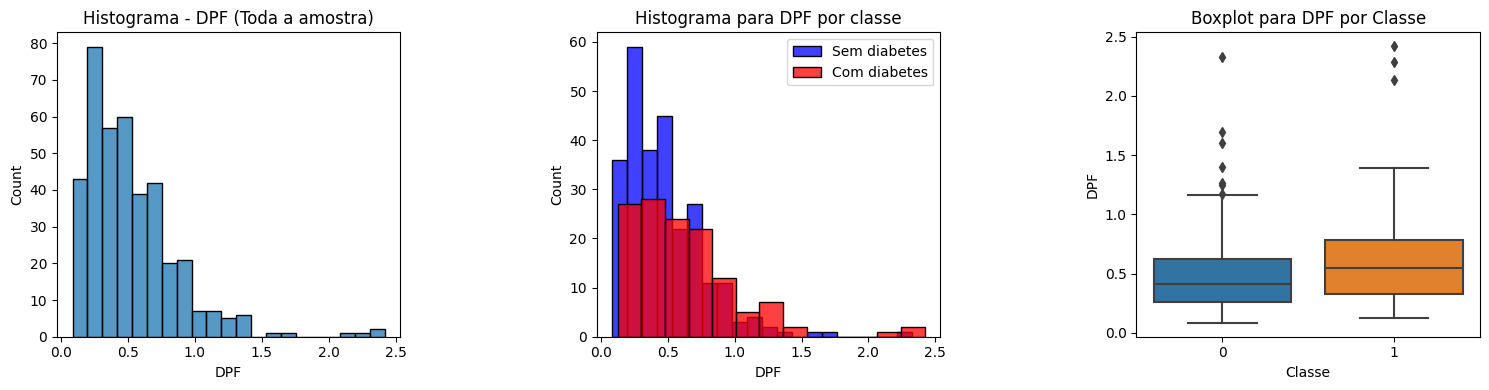

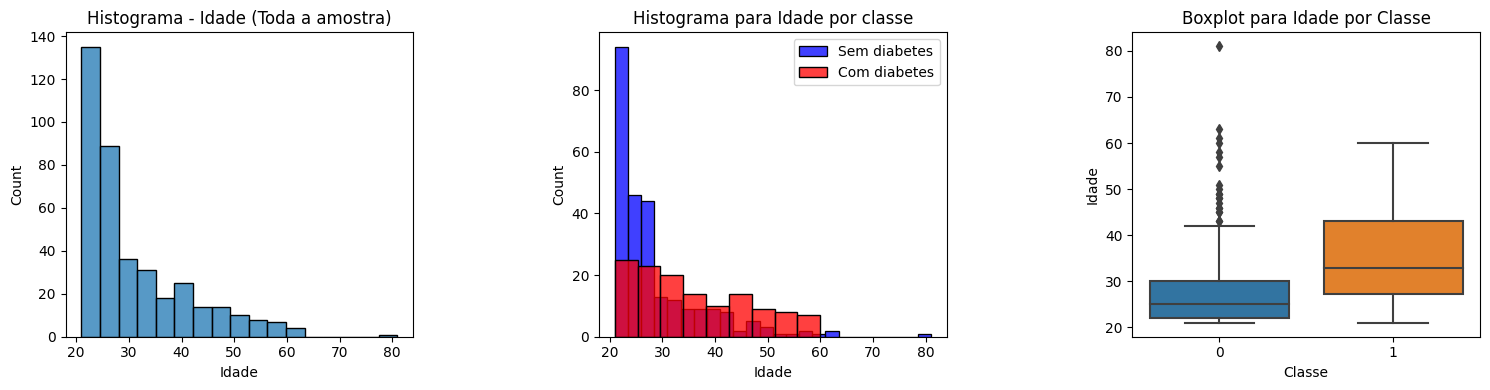

In [ ]:
#@title :
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv("/content/drive/MyDrive/base_dados/diabetes_preprocessado.csv", names=['#Gravidezes', 'Glicose', 'PD', \
                                        'DobraTriceps', 'Insulina', 'IMC', \
                                        'DPF',#DiabetesPedigreeFunction, \
                                        'Idade', \
                                        'Classe'])

#criando duas váriaves que recebe um novo df, um recebe o valor 1 que está registrado na Classe como "possui diabetes e 0 para 'não possui
com_diabetes = df[df.Classe==1]
sem_diabetes = df[df.Classe==0]



#gráficos
for variavel in df.columns:
    if variavel != 'Classe':

        # Histograma da variável:
        plt.figure(figsize=(15, 4))
        plt.subplot(1,3,1)
        plt.title('Histograma - ' + variavel + ' (Toda a amostra)')
        sns.histplot(df[variavel],kde=False)

        # Histograma por classe:
        plt.subplot(1,3,2)
        sns.histplot(sem_diabetes[variavel],kde=False,color="Blue")
        sns.histplot(com_diabetes[variavel],kde=False,color="Red")
        plt.title("Histograma para " +  variavel + " por classe")
        plt.legend(['Sem diabetes', 'Com diabetes'])

        #BoxPlot por classe
        plt.subplot(1,3,3)
        sns.boxplot(x=df.Classe,y=df[variavel])
        plt.title('Boxplot para ' + variavel + ' por Classe')
        plt.tight_layout(w_pad=10.0)


\
####***Modelo p/identificar se pacientes têm ou não diabetes (parte3)***  
* Matriz de correlação
* Matriz de diagramas de dispersão
* Coeficiente de correlação Person ***𝘱***

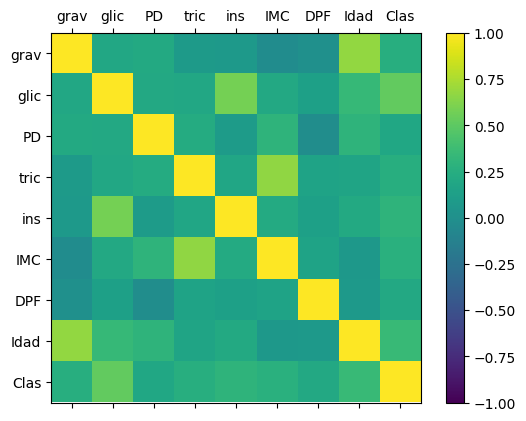

In [ ]:
#@title #####**1. Matriz de correlação**
matriz= df.corr()
grafico= plt.figure()

subgrafico= grafico.add_subplot(111)

cax= subgrafico.matshow(matriz, vmin=-1, vmax=1,cmap='viridis')
grafico.colorbar(cax)

ticks= np.arange(0,9,1)
subgrafico.set_xticks(ticks)
subgrafico.set_yticks(ticks)

titulos_abrev= ['grav', 'glic','PD','tric','ins','IMC','DPF','Idad','Clas']
subgrafico.set_xticklabels(titulos_abrev)
subgrafico.set_yticklabels(titulos_abrev)
plt.show()

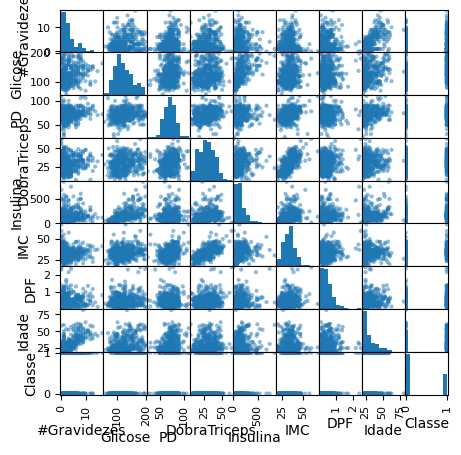

In [ ]:
#@title #####**2. Matriz de diagrama de dispersão**
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(5,5))
plt.show()


In [ ]:
#@title #####**3. Coeficiente de Correlação Person**
coeficiente= df.corr()
coeficiente

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DPF,Idade,Classe
#Gravidezes,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glicose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
PD,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
DobraTriceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulina,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
IMC,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DPF,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Idade,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Classe,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


\

\
###**Análise Exploratória de Dados com** *PANDAS PROFILING*

\

In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
df = pd.read_csv('/content/drive/MyDrive/base_dados/diabetes.csv',
                 names=['#Gravidezes','Glicose', 'PD', 'DobraTriceps',
                      'Insulina', 'IMC', 'DPF', 'Idade', 'Classe'])
arquivo= ProfileReport(df)
arquivo.to_file(output_file= 'relatorio2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

\

###**Teste de Hipótese nos atributos "PD" e "IMC"**
 * Shapiro-Wilk: Testa a hipótese nula de que uma amostra obedece uma ***distribuição normal***

In [ ]:
import pandas as pd
from scipy.stats import shapiro

df= pd.read_csv('/content/drive/MyDrive/base_dados/diabetes_preprocessado.csv',
                names=['#Gravidezes','Glicose', 'PD', 'DobraTriceps',
                      'Insulina', 'IMC', 'DPF', 'Idade', 'Classe'])
stat, p= shapiro(df['PD'])
print(f'Estatistica= {stat :.3f}, p= {p :.3f}')
alfa= 0.05
if (p > alfa):
  print('Não é possível rejeitar a hipótese nula (PD segue uma Distribuição Normal)')
else:
  print('Hipótese nula rejeitada (PD NÃO segue uma Distribuição Normal)')

stat, p= shapiro(df['IMC'])
print(f'Estatistica= {stat :.3f}, p= {p :.3f}')
if (p > alfa):
  print('Não é possível rejeitar a hipótese nula (IMC segue uma Distribuição Normal)')
else:
  print('Hipótese nula rejeitada (IMC NÃO segue uma Distribuição Normal)')

Estatistica= 0.990, p= 0.009
Hipótese nula rejeitada (PD NÃO segue uma Distribuição Normal)
Estatistica= 0.974, p= 0.000
Hipótese nula rejeitada (IMC NÃO segue uma Distribuição Normal)



\
###**Escalonando Dados**
* Para evitar OUTLIERS iremos padronizar os dados em uma mesma escala, utilizaremos a biblioteca ***scikit-learn***.

\

In [ ]:
from sklearn.preprocessing import StandardScaler
from time import sleep

#irrelevante
print('PADRONIZANDO OS DADOS')
for _ in range(3):
    sleep(0.5)
    print('.', end='')

#Seleção dos atributos
#Seleção das variaveis independentes:
X= df.drop('Classe', axis=1) # variavel independente
y= df['Classe'] # variavel dependente

#Padronização dos dados:
escalonador= StandardScaler()
X= escalonador.fit_transform(X)
df_X= pd.DataFrame(X)

#irrelevante
print('DADOS PADRONIZADOS')

PADRONIZANDO OS DADOS
...DADOS PADRONIZADOS




\
###**Treinamento e teste do algoritmo**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_treino, X_teste, y_treino, y_teste= train_test_split(df_X, y, test_size= 0.5)
algoritmo= LogisticRegression()
algoritmo.fit(X_treino, y_treino)

#realizando previsao
y_previsao= algoritmo.predict(X_teste)

#verificando acuracia do modelo
score= algoritmo.score(X_teste, y_teste)
print(f'Acuracia do modelo: {score :.2f}')

Acuracia do modelo: 0.79


\


##**Cap 14** - Support Vector Machines (SVM)

\

É um algoritmo de classificação cujo o objetivo é traçar uma ou mais retas que divida de maneira distributiva, com margem máxima, um conjunto de pontos de um espaço vetorial, que represente os dados do problema.    

Trabalha apenas com dados linearmente separáveis.

---
\

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[[61  4]
 [13 22]]


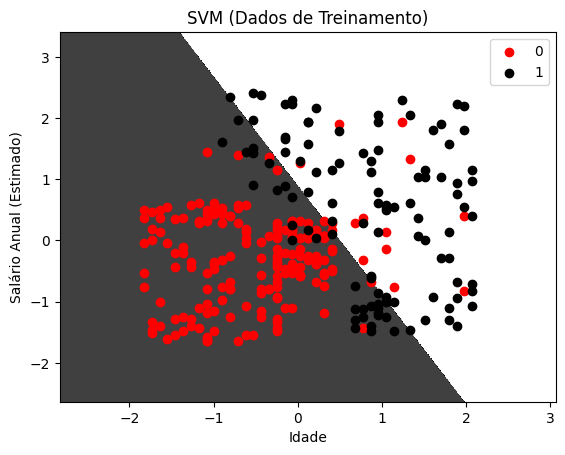

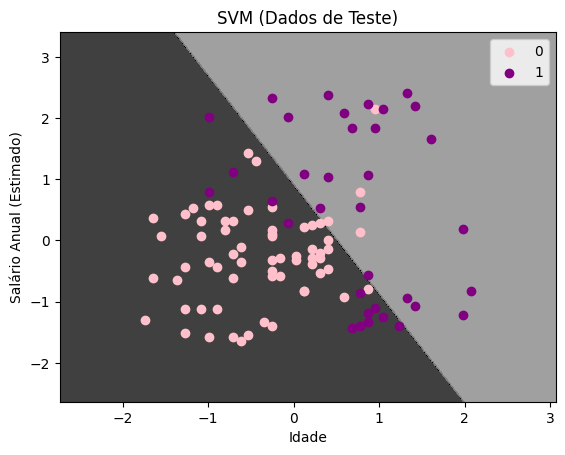

In [ ]:
#@title **Executando o Algoritmo**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df= pd.read_csv('/content/drive/MyDrive/base_dados/Social_Network_Ads.csv')

X = df.iloc[:, [2, 3]].values #variavel independete (idade e salario anual)
y = df.iloc[:, -1].values #atributo previsor

#Divisao das amostras
X_treino, X_teste, y_treino, y_teste= train_test_split(X, y, test_size= 0.25, random_state= 3) # 0.25 representa 25% da amostra que sera usada para teste/ random_state define uma semente aleatoria, utilizado para obter os msm resultados que nós.

#Padronizando dados/ aplica as variáveis na mesma escala
sc= StandardScaler()
X_treino= sc.fit_transform(X_treino)
X_teste= sc.transform(X_teste)

#Treinando o classificador sobre o conjunto de teste
algoritmo= SVC(kernel= 'linear', random_state= 3)
algoritmo.fit(X_treino, y_treino)

#Previsao de resultados
y_prev= algoritmo.predict(X_teste)

#Gerando matriz de confusao
cm= confusion_matrix(y_teste, y_prev)
print(cm)

#Visualizando os resultados dos dados de treino
_X, _y= X_treino, y_treino

X1, X2= np.meshgrid(np.arange(start= _X[:, 0].min() - 1, stop= _X[:, 0].max() + 1, step= 0.01), #idade. Step se refere ao intervalo entre os valores/define o espaçamento entre os números na sequência.
                     np.arange(start= _X[:, 1].min() - 1, stop= _X[:, 1].max() + 1, step= 0.01)) #renda anual.

plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha= 0.75, cmap= ListedColormap(('black', 'white'))) #desenhando o contorno da região do mapa

plt.xlim(X1.min(), X1.max()) #estabelecendo limites do gráfico nos eixos X e Y.
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(_y)):  #plotando os pontos de dados no gráfico
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                color= ListedColormap(('red', 'black'))(i), label= j)

plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

#Visualizando os resultados dos dados de teste
_X, _y= X_teste, y_teste

X1, X2= np.meshgrid(np.arange(start= _X[:, 0].min() - 1, stop= _X[:, 0].max() + 1, step= 0.01),
                    np.arange(start= _X[:, 1].min() - 1, stop= _X[:, 1].max() + 1, step= 0.01))

plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha= 0.75, cmap= ListedColormap(('black', 'gray')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                color= ListedColormap(('pink', 'purple'))(i), label= j)

plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

